<a href="https://colab.research.google.com/github/Sujit-Rukade/Loan_Approval_Prediction/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mounted google drive to access the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df = pd.read_csv('/content/drive/My Drive/loan_approval_dataset.csv')
df = pd.read_csv('loan_approval_dataset.csv')

In [ ]:
# df = pd.read_csv('loan_approval_dataset.csv')

In [ ]:
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

# Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[' education'] = le.fit_transform(df[' education'])
df[' self_employed'] = le.fit_transform(df[' self_employed'])
df[' loan_status'] = le.fit_transform(df[' loan_status'])

# Data Visualization

In [ ]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df['loan_status'].value_counts()

0    2656
1    1613
Name: loan_status, dtype: int64

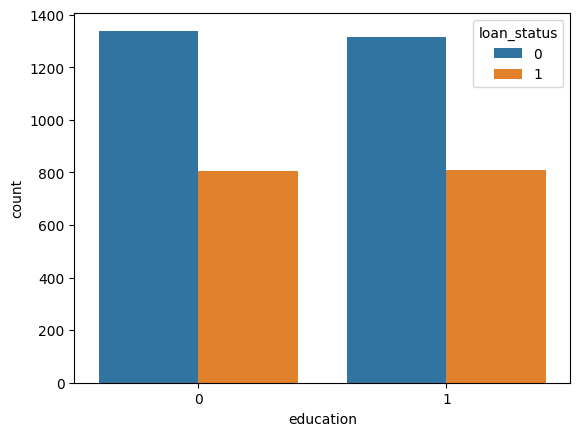

In [ ]:
sns.countplot(x='education', hue= 'loan_status', data=df);

In [ ]:
df['education'].value_counts()

0    2144
1    2125
Name: education, dtype: int64

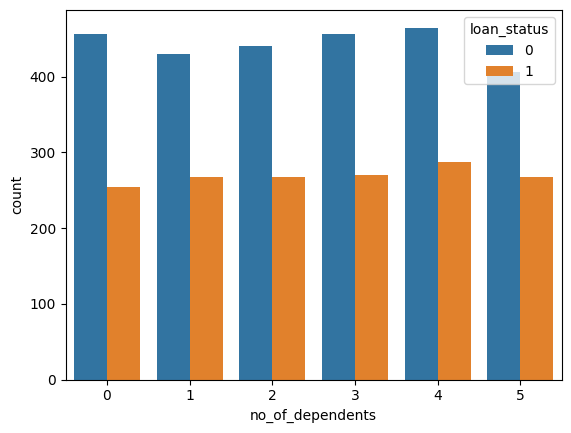

In [ ]:
sns.countplot(x= 'no_of_dependents', hue= 'loan_status', data= df);

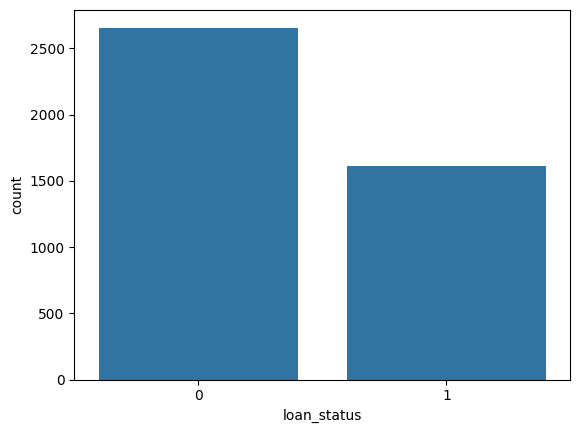

In [ ]:
sns.countplot(x = 'loan_status', data = df);

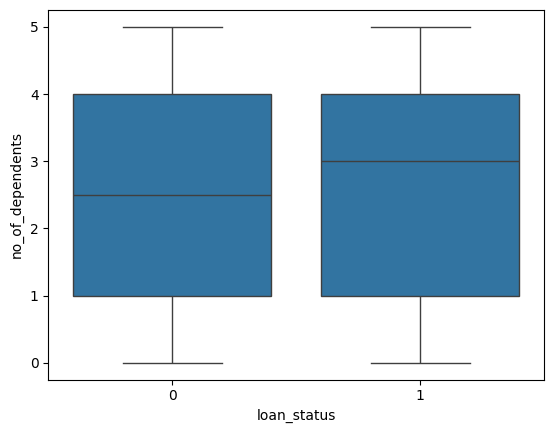

In [ ]:
sns.boxplot(data=df, x ="loan_status", y ="no_of_dependents")
plt.show()

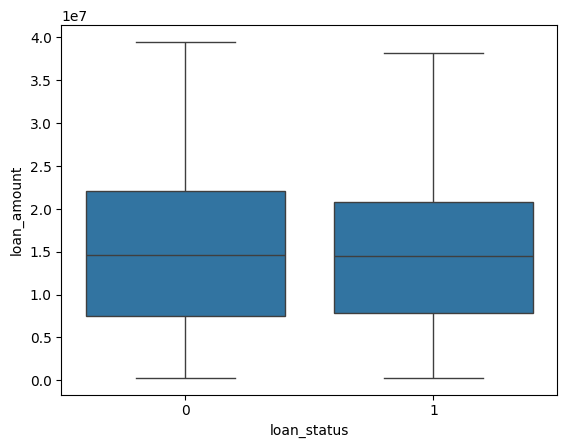

In [ ]:
sns.boxplot(data=df, x ="loan_status", y ="loan_amount")
plt.show()

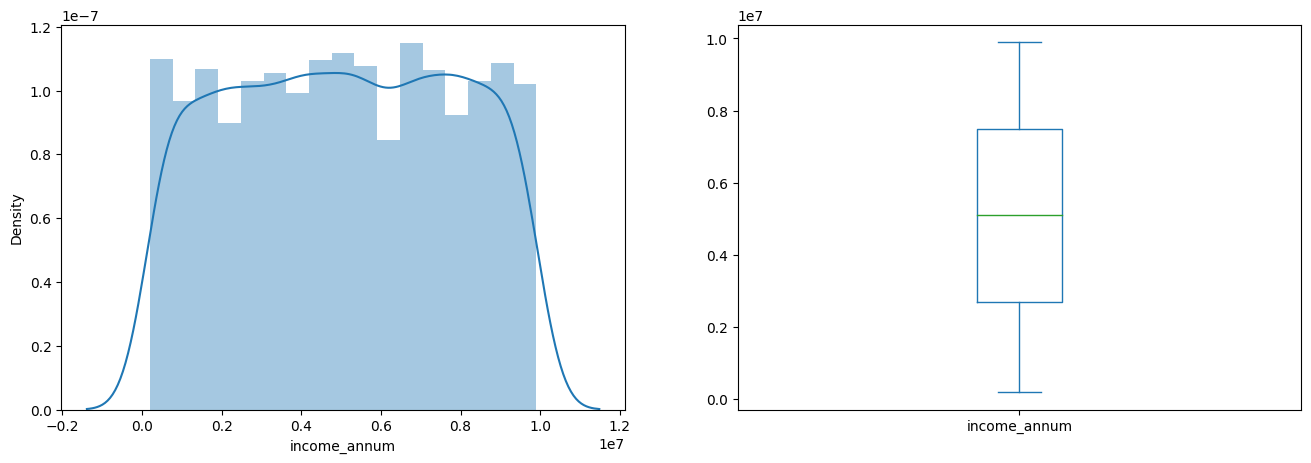

In [ ]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(df['income_annum']);
plt.subplot(1,2,2)
df['income_annum'].plot.box(figsize=(16,5))
plt.show();

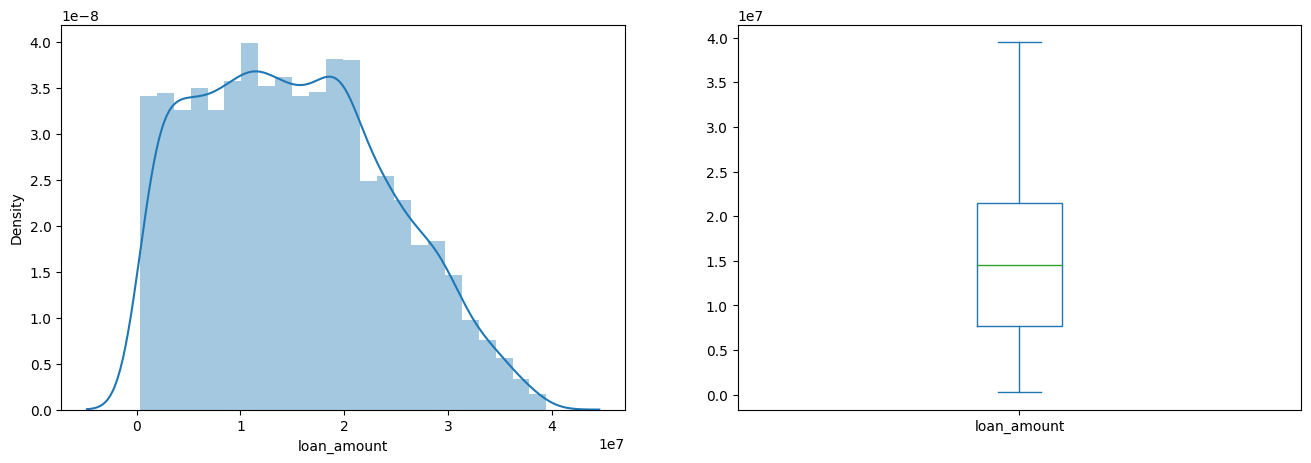

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['loan_amount']);
plt.subplot(122)
df['loan_amount'].plot.box(figsize=(16,5))
plt.show()

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [ ]:
df.drop('loan_id', axis = 1, inplace= True)

In [ ]:
df.duplicated()        # Checking For Duplicate Values

0       False
1       False
2       False
3       False
4       False
        ...  
4264    False
4265    False
4266    False
4267    False
4268    False
Length: 4269, dtype: bool

In [ ]:
df.shape

(4269, 12)

In [ ]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

## Spliting dataset into dependent and independent features

In [ ]:
x = df.drop('loan_status', axis= 1)
y = df['loan_status']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_scaled = sc.fit_transform(x)

 **Comment:
Changed the random state to 45; as keeping it 0 can yield consistent results**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state= 45)

# Model Training 1- Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier()

# Training
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# Predictions
y_pred = rf_classifier.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9824355971896955


In [ ]:
# initial params
# params = {
#     'n_estimators': [int(x) for x in np.linspace(50,500,10)],
#     'max_features': ['sqrt', 'log2'],
#     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#     # 'max_depth': [1, 2, 5, None],
#     'criterion': ['gini', 'entropy', 'log_loss']
# }

**Comment: Changed the hyper parameters**

#Try1

In [ ]:
params = {
    'n_estimators': [int(x) for x in np.linspace(50, 1000, 20)],  # Increased upper limit and number of steps
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 10, 15, 20, 25],  # Adjusted range for max_depth
    'criterion': ['gini', 'entropy']   # Removed 'log_loss'
}

In [ ]:
# import grid search algorithm

from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=params,
                    scoring='accuracy',
                    error_score='raise',
                    cv=5)

this cell took me around 1.2 hr

In [ ]:
grid.fit(x_scaled, y)

KeyboardInterrupt: 

In [ ]:
best_model = grid.best_estimator_

In [ ]:
y_pred = best_model.predict(x_test)

In [ ]:
# Model performance
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)


## Model Building 2- RandomizedSearchCV

This defines a grid of hyperparameters to search over. For each hyperparameter, we specify a list of possible values

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#  Random Forest classifier
rf_classifier = RandomForestClassifier()

RandomizedSearchCV is initialized with the RandomForestClassifier, the parameter grid, the number of iterations (n_iter), cross-validation folds (cv), verbosity level (verbose), random seed (random_state), and number of jobs to run in parallel (n_jobs)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Initializing RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)


RandomizedSearchCV performs the search for the best hyperparameters using the specified parameter grid and cross-validation strategy

The below code will take around 8-9 mins depending on your internet speed

In [ ]:
# Perform Randomized Search to find best parameters
rf_random_search.fit(x_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

The best hyperparameters are retrieved here

In [ ]:
# Get the best parameters
best_params = rf_random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}


A new RandomForestClassifier instance is created with the best hyperparameters and then trained on the training data

In [ ]:
# Use the best parameters to train the model
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=300)

In [ ]:
# Predictions
y_pred = best_rf_classifier.predict(x_test)


In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.977751756440281


# KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_params = {
    'n_neighbors': [5,7,10,12,15,18,20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [ ]:
# err = []
# for i in range(1,50):
#   knn = KNeighborsClassifier(n_neighbors= i)
#   knn.fit(x_train,y_train)
#   y_pred = knn.predict(x_test)
#   err.append(np.mean(y_test != y_pred))

In [ ]:
# plt.xticks(range(1,25),rotation = 0)
# plt.plot(range(1,50),err, color = 'r', marker = 'o', mfc = 'b')
# plt.grid()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator= KNeighborsClassifier(),
                    param_grid = knn_params,
                    scoring= 'accuracy',
                    cv = 5)       # 'cv' parameter splits the set in 5 parts so we do not have to use x_train and y_train

In [ ]:
# clf = KNeighborsClassifier(n_neighbors=24)
# clf.fit(x_train,y_train)
# y_pred = knn.predict(x_test)
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test,y_pred)

In [ ]:
grid.fit(x_scaled,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 10, 12, 15, 18, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=18, weights='distance')

In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test,y_pred)

1.0